<h3 align="center">Welcome to this notebook.</h3>
 <h4 align="center">Here is a try to train a model for predicting prices of smartphones.</h4>

<p>My primary goal is to train a "missing values tolerant" model in order to predict a smartphone's price. The reason for missing values tolerance is that a user could get a value even if he/she knows just some of the phone specs.
For this reason, I will use a xgboost algorithm, at the end.</p>

Dataset is from https://www.kaggle.com/datasets/abdurrahman22224/smartphone-new-data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/data.csv")
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  975 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [4]:
df.shape

(980, 25)

In [5]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,975.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.770256,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.838338,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In order to keep it simple, for user interaction, we will fit our model with very specific features. 

In [6]:
features = ['brand_name', 'num_cores',
            'ram_capacity', 'internal_memory',
            'battery_capacity','fast_charging_available',
            'primary_camera_rear', 'primary_camera_front']

df = df[features +['price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               980 non-null    object 
 1   num_cores                975 non-null    float64
 2   ram_capacity             980 non-null    float64
 3   internal_memory          980 non-null    float64
 4   battery_capacity         969 non-null    float64
 5   fast_charging_available  980 non-null    int64  
 6   primary_camera_rear      980 non-null    float64
 7   primary_camera_front     975 non-null    float64
 8   price                    980 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 69.0+ KB


There are some missing values.

<h2 align="center">EDA</h2>

<h3>Price</h3>

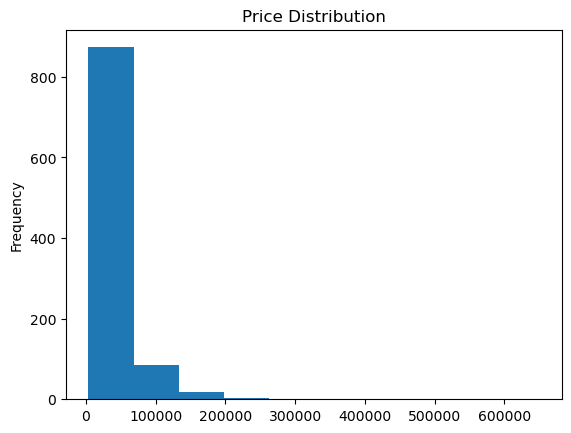

In [7]:
df['price'].plot(kind='hist', title='Price Distribution');

The dataset was created from https://www.smartprix.com and uses INR currency. To make it convenient for my European location, I will convert the prices to EUR.

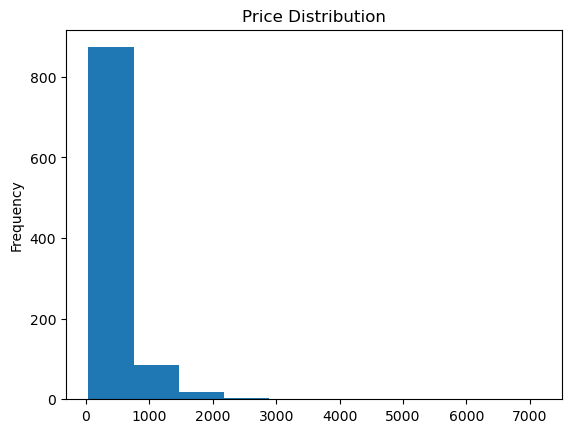

In [8]:
df['price'] = round(df['price']*0.011, 2)
df['price'].plot(kind='hist', title='Price Distribution');

It seems that there are devices over 3000€.

In [9]:
high_cost_devices = df[df['price']>3000]
high_cost_devices

,brand_name,num_cores,ram_capacity,internal_memory,battery_capacity,fast_charging_available,primary_camera_rear,primary_camera_front,price
427,vertu,8.0,2.0,64.0,2275.0,0,13.0,2.1,7150.0
887,xiaomi,8.0,8.0,256.0,4000.0,1,48.0,20.0,5280.0


So, there are 2 smartphones with exceptionally high prices. Both of them have the word "Signature" in their model's name. That means they are luxury devices but they do have not special performance capabilities. If we train a model with these instances, they will affect just a little the model performance, if not at all. However, I will delete these values for better comprehension of diagrams.

In [10]:
df.drop(high_cost_devices.index, axis=0, inplace=True)

<h3>brand_name</h3>

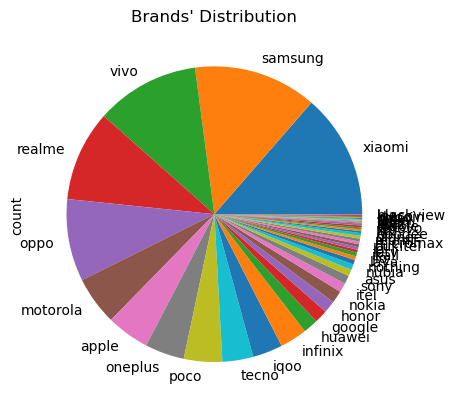

In [11]:
df['brand_name'].value_counts().plot(kind='pie', title="Brands' Distribution");

In [12]:
print(f"There are a total of {df['brand_name'].nunique()} brands. \
But only 5 of them make up more than 50% of the dataset.")

There are a total of 45 brands. But only 5 of them make up more than 50% of the dataset.


In [13]:
df['brand_name'].value_counts()

brand_name
xiaomi       133
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
ikall          3
letv           3
lg             3
oukitel        3
micromax       3
redmi          3
gionee         3
doogee         2
lyf            2
zte            2
lenovo         2
royole         2
leitz          1
sharp          1
cat            1
tcl            1
tesla          1
blu            1
cola           1
duoqin         1
leeco          1
blackview      1
Name: count, dtype: int64

There are a lot of different brands. I will keep only these with more than 10 devices on dataset. I will merge the rest of them in one category with the 'other' label.

In [14]:
#Let's see the price distribution of the top 15 most popular brands.
popular_brands = df['brand_name'].value_counts()[:15].index.values
popular_brands

array(['xiaomi', 'samsung', 'vivo', 'realme', 'oppo', 'motorola', 'apple',
       'oneplus', 'poco', 'tecno', 'iqoo', 'infinix', 'huawei', 'google',
       'honor'], dtype=object)

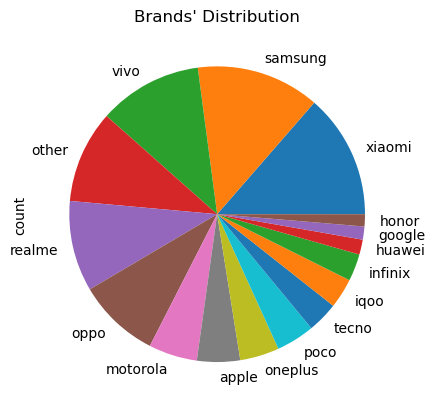

In [15]:
df['brand_name'] = df['brand_name'].apply(lambda x: x if x in popular_brands else 'other')
df['brand_name'].value_counts().plot(kind='pie', title="Brands' Distribution");

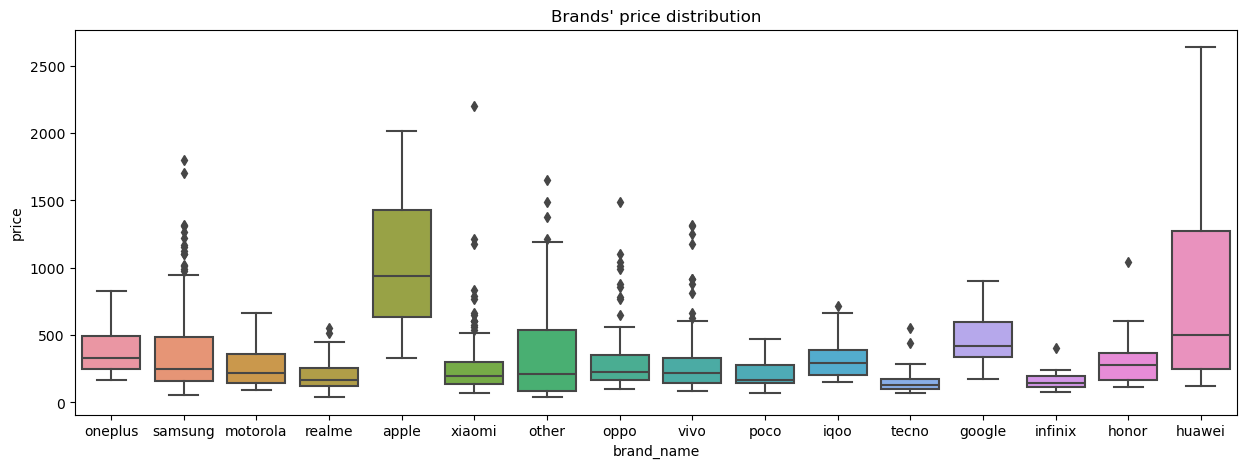

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x='brand_name', y='price', data=df).set_title("Brands' price distribution")
plt.show()

<h3>num_cores</h3>

In [17]:
df['num_cores'].value_counts()

num_cores
8.0    897
6.0     40
4.0     36
Name: count, dtype: int64

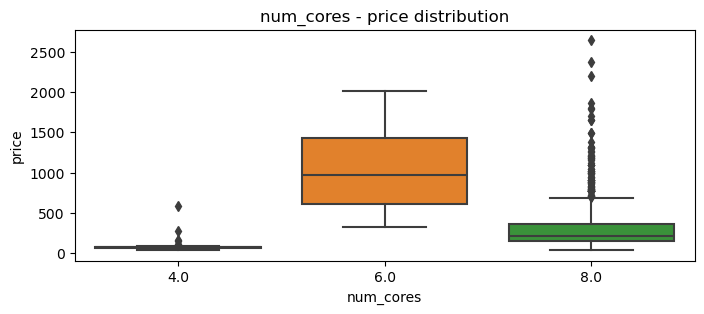

In [18]:
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(x='num_cores', y='price', data=df).set_title("num_cores - price distribution")
plt.show()

Here there is something strange. Six-core processors are more expensive by mean than eight-core ones. Why is this happening?
Also, devices with 8-cores processors are the majority in high level. It may be better to train my model with only these.

<h3>Battery Capacity (mAh)</h3>

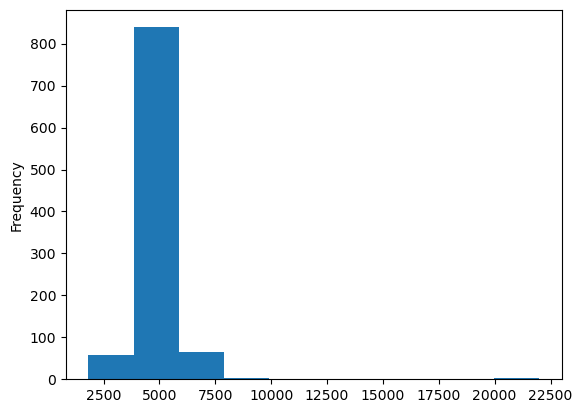

In [19]:
df['battery_capacity'].plot(kind='hist');

It seems that there are some outliers, values over 7500 mAh.

In [20]:
df[df['battery_capacity']>7500][['brand_name','battery_capacity','price']]

,brand_name,battery_capacity,price
391,other,21000.0,329.89
599,other,9800.0,252.89
843,other,22000.0,505.99
966,other,8000.0,284.89


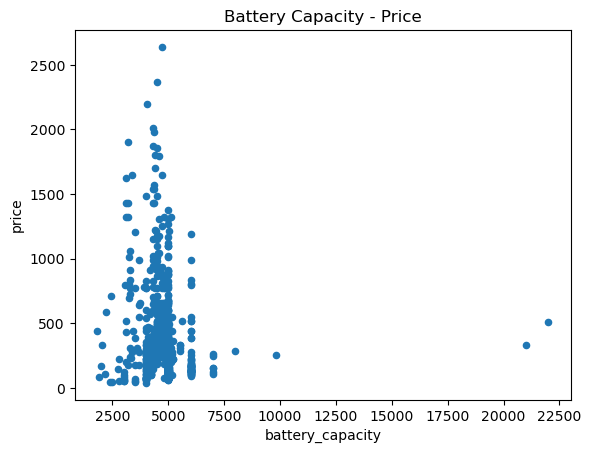

In [21]:
df[['battery_capacity', 'price']].plot(x='battery_capacity', y='price', kind='scatter', title='Battery Capacity - Price');

Battery capacity and price is not seem to has any corelation.
There are two divices over 20k mAh. Later I will use IQR technique to identify and remove outliers.

<h3>fast_charging_available</h3>

In [22]:
df['fast_charging_available'].value_counts()

fast_charging_available
1    836
0    142
Name: count, dtype: int64

In [23]:
df[['fast_charging_available', 'price']].groupby('fast_charging_available').mean()['price']

fast_charging_available
0    186.276620
1    372.835251
Name: price, dtype: float64

There are very few instances of devices without fast charging.
If a device has fast charging, it costs more.

<h3>RAM</h3>

In [24]:
df['ram_capacity'].value_counts()

ram_capacity
8.0     338
6.0     234
4.0     217
12.0     86
3.0      54
2.0      31
16.0      9
1.0       7
18.0      2
Name: count, dtype: int64

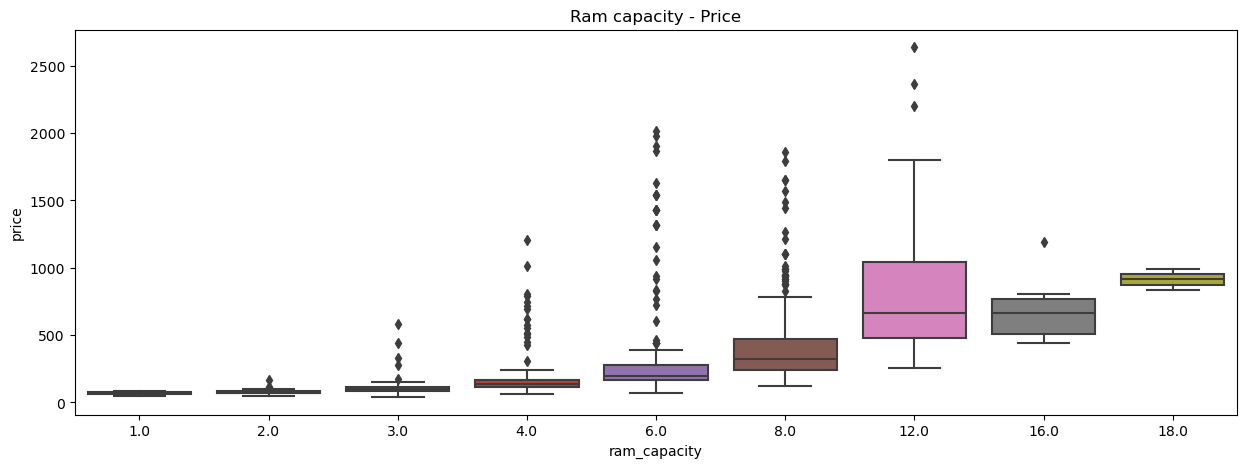

In [25]:
fig, ax  = plt.subplots(figsize=(15,5))
sns.boxplot(x='ram_capacity', y='price', data=df).set_title("Ram capacity - Price")
plt.show()

ram_capacity is a prety decent feature. While it raises, price raises too.

<h3>internal_memory (Storage)</h3>

In [26]:
df['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      192
256.0     156
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

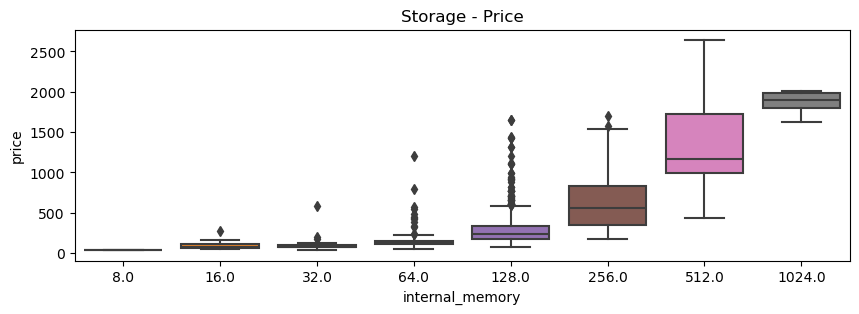

In [27]:
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(x='internal_memory', y='price', data=df).set_title("Storage - Price")
plt.show()

Storage memory, like ram, seems to be a very good feature for predicting price.

In [28]:
df.columns


Index(['brand_name', 'num_cores', 'ram_capacity', 'internal_memory',
       'battery_capacity', 'fast_charging_available', 'primary_camera_rear',
       'primary_camera_front', 'price'],
      dtype='object')

<h3>primary_camera_rear  (MP)</h3>

In [29]:
df['primary_camera_rear'].value_counts()

primary_camera_rear
50.0     333
64.0     181
13.0     115
48.0     113
108.0     80
12.0      57
8.0       39
200.0     18
16.0      17
5.0        6
12.2       4
54.0       3
50.3       3
20.0       3
2.0        2
24.0       2
47.2       1
40.0       1
Name: count, dtype: int64

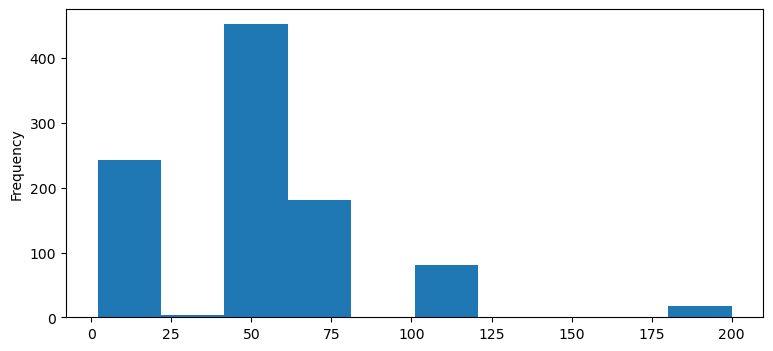

In [30]:
df['primary_camera_rear'].plot(kind='hist', figsize=(9,4));

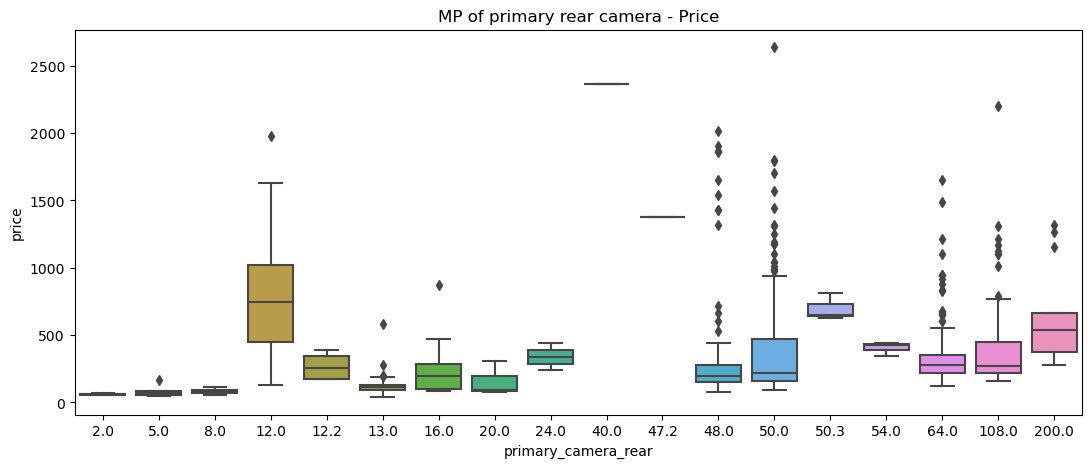

In [31]:
fig, ax = plt.subplots(figsize=(13,5))
ax.set_title("MP of primary rear camera - Price")
sns.boxplot(x='primary_camera_rear', y='price', data=df)
plt.show()

<h3>primary_camera_front</h3>

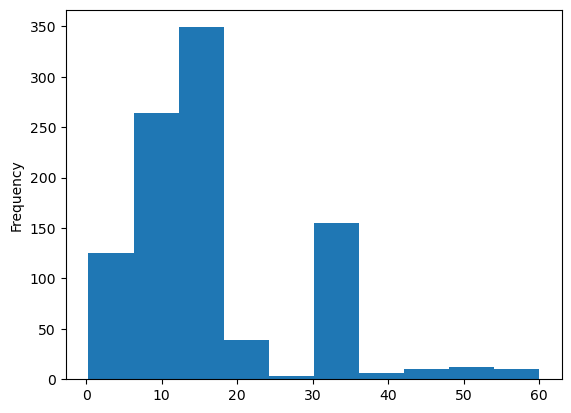

In [32]:
df['primary_camera_front'].plot(kind='hist');

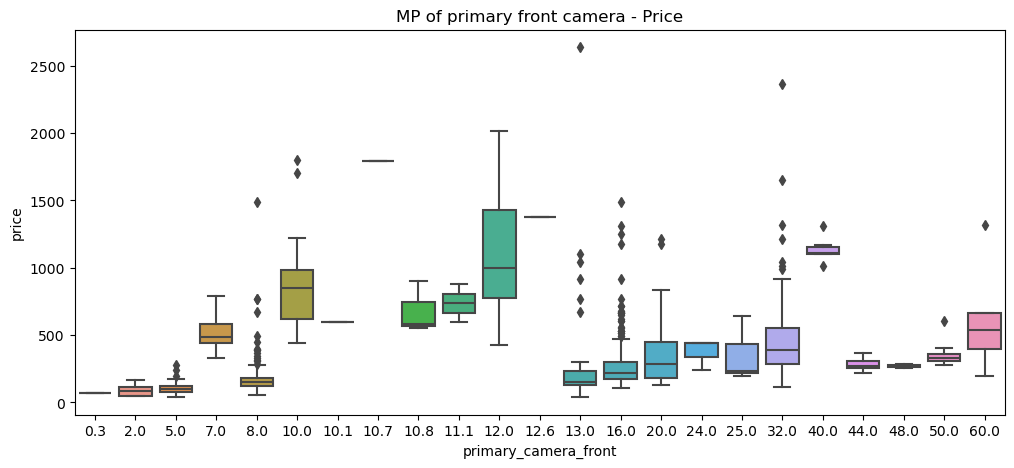

In [33]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title("MP of primary front camera - Price")
sns.boxplot(x='primary_camera_front', y='price', data=df)
plt.show()

<h2 align="center">Preprocessing</h2>

<h3>Outliers</h3>

Tree-based algoritms are robust to outliers but we may remove some of them.

In [34]:
def remove_outliers_based_on_IQR(df, column_name, plot_hist=False):
    if plot_hist: 
        fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,3))
        _, bins,_ = axs[0].hist(df[column_name])
        axs[0].title.set_text('With outliers')
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    higher_limit = Q3 + 1.5*IQR
    print(f'For column: {column_name}\nQ1 = {Q1}, Q3 = {Q3}, IQR = {IQR} \nlower_limit = {lower_limit}, higher_limit = {higher_limit}')
    previous_rows_number = df.shape[0]
    df.drop( df[(df[column_name]<lower_limit) | (df[column_name]>higher_limit)].index, axis=0, inplace=True)
    print(f"{previous_rows_number - df.shape[0]} rows have been deleted.")
    if plot_hist:
        axs[1].hist(df[column_name], bins=bins)
        axs[1].title.set_text('Without outliers')

For column: price
Q1 = 142.99, Q3 = 388.2075, IQR = 245.21749999999997 
lower_limit = -224.83624999999995, higher_limit = 756.0337499999999
105 rows have been deleted.


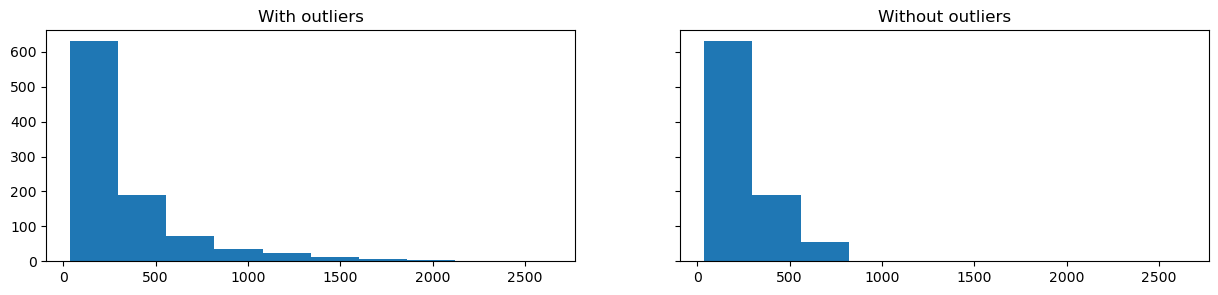

In [35]:
remove_outliers_based_on_IQR(df, 'price', plot_hist=True)

For column: battery_capacity
Q1 = 4500.0, Q3 = 5000.0, IQR = 500.0 
lower_limit = 3750.0, higher_limit = 5750.0
106 rows have been deleted.


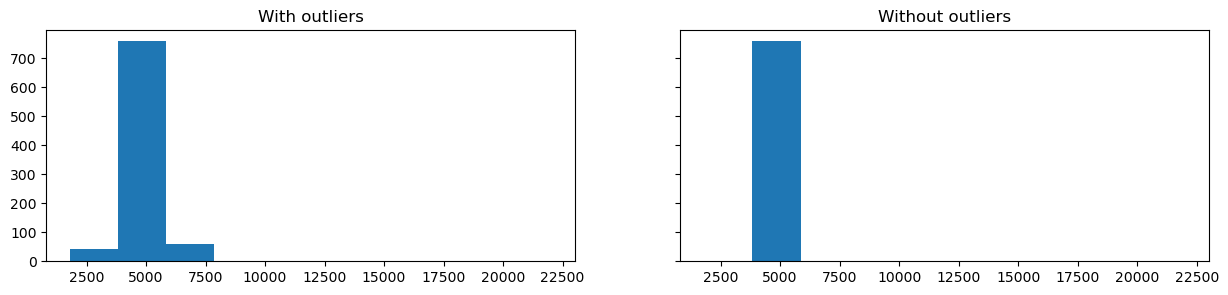

In [36]:
remove_outliers_based_on_IQR(df, 'battery_capacity', plot_hist=True)

C:\Users\KouLazos\AppData\Local\Temp\ipykernel_8548\168985630.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(sharey=True, ax=axs)


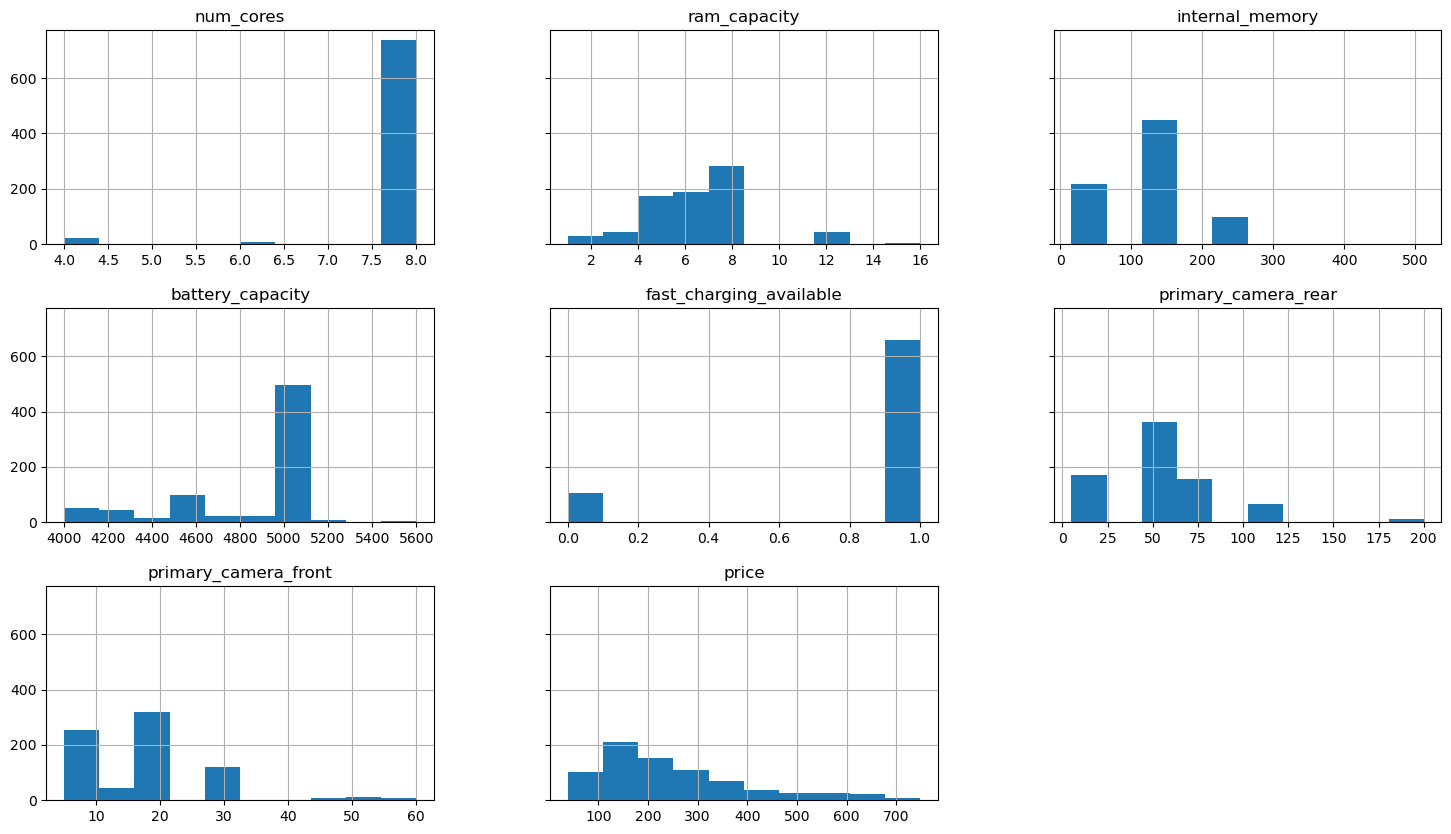

In [37]:
fig, axs = plt.subplots(figsize=(18,10))
df.hist(sharey=True, ax=axs)
plt.show()

<h2 align="center">Model</h2>

The model I am training is Regressor from XGBoost. I am using this because it is handling missing values like normal values, and this is very convinient for the system that I am trying to implement. 
So, let's suppose that a user is searching a price that Samsung's smartphones have. He is serching for a 6-core phone with 8GB Ram and 256GB Internal Storage. The user does not care about battery and cameras. So he/she is not giving any information for these. XGBoost model could give him a good prediction, even if there are missing values.  

In [38]:
import xgboost as xgb
print(xgb.__version__)
from sklearn.model_selection import cross_validate

1.7.3


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 979
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               767 non-null    object 
 1   num_cores                767 non-null    float64
 2   ram_capacity             767 non-null    float64
 3   internal_memory          767 non-null    float64
 4   battery_capacity         759 non-null    float64
 5   fast_charging_available  767 non-null    int64  
 6   primary_camera_rear      767 non-null    float64
 7   primary_camera_front     767 non-null    float64
 8   price                    767 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.9+ KB


'brand_name' feature's type has to be converted to 'category' in order for the model to work properly.

In [40]:
df['brand_name'] = df['brand_name'].astype('category')

In [41]:
X = df.drop('price', axis=1)
y = df['price']

I am using a XGBoost model for regression and I set enable_categorical parameter to True. 

In [42]:
model = xgb.XGBRegressor(objective='reg:squarederror', #default 
                        booster='gbtree',#default
                        tree_method='hist',
                        enable_categorical=True,
                        missing=np.nan, random_state=42)

In [43]:
res = cross_validate(model, X, y, return_train_score=True, n_jobs=1)
display(res)


{'fit_time': array([0.26984668, 0.24985623, 0.25285363, 0.26784325, 0.24585962]),
 'score_time': array([0.0159905 , 0.01599193, 0.0159905 , 0.01499176, 0.0159905 ]),
 'test_score': array([0.63665708, 0.78005143, 0.47966181, 0.54956093, 0.68440406]),
 'train_score': array([0.96237628, 0.94498827, 0.9628782 , 0.95829226, 0.95967001])}

In [44]:
mean_test_score,mean_test_score_std  = round(res['test_score'].mean(), 3), round(res['test_score'].std(), 2)
display(f"Mean Test Score: {mean_test_score}")
display(f"Standar Deviation: {mean_test_score_std}")

'Mean Test Score: 0.626'

'Standar Deviation: 0.1'

Now, we have a basic threshold for accuracy. Mean test score is 62%, this is neither bad nor good. Let's optimize the parameters.

<h3>Hyperparameterization</h3>

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'n_estimators': np.arange(40,120,5),    #np.arange(40,220,25),
    'max_depth' :[3,4,5], 
    'learning_rate':[ 0.05, 0.07,0.1, 0.13, 0.15, 0.17]
}

gs = GridSearchCV(model, param_grid, cv=5, return_train_score=True, n_jobs=1)
gs

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.07, 0.1, 0.13, 0.15, 0.17],
                         'max_depth': [3, 4, 5],
                         'n_estimators': array([ 40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105, 110, 115])},
             return_train_score=True)

In [47]:
%%time
gs.fit(X,y)

CPU times: total: 15min 12s
Wall time: 4min 38s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.07, 0.1, 0.13, 0.15, 0.17],
                         'max_depth': [3, 4, 5],
                         'n_estimators': array([ 40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105, 110, 115])},
             return_train_score=True)

In [48]:
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 65}
0.7087978073211462


In [49]:
res_df = pd.DataFrame(gs.cv_results_).set_index('rank_test_score')
res_df = res_df[['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
res_df.sort_values("mean_test_score", ascending=False)

,param_n_estimators,param_max_depth,param_learning_rate,mean_test_score,std_test_score,mean_train_score,std_train_score
rank_test_score,,,,,,,
1,65,3,0.13,0.708798,0.048145,0.838929,0.006434
2,80,3,0.13,0.708648,0.051718,0.850107,0.006668
3,90,3,0.13,0.708450,0.052332,0.856536,0.006055
4,95,3,0.13,0.708245,0.051749,0.858474,0.006580
5,60,3,0.13,0.708140,0.048928,0.835215,0.005828
...,...,...,...,...,...,...,...
284,45,4,0.05,0.636339,0.039107,0.744725,0.009505
285,45,3,0.05,0.634277,0.038622,0.708443,0.008766
286,40,5,0.05,0.613455,0.032697,0.738431,0.010234


,mean_test_score
param_n_estimators,
65,0.708798
80,0.708648
90,0.708450
95,0.708245
60,0.708140
85,0.708051
100,0.707794
55,0.707010
75,0.706846


,mean_test_score
param_max_depth,
3,0.708798
4,0.699689
5,0.692957


,mean_test_score
param_learning_rate,
0.13,0.708798
0.15,0.705389
0.07,0.704239
0.17,0.702984
0.10,0.701242
0.05,0.699485


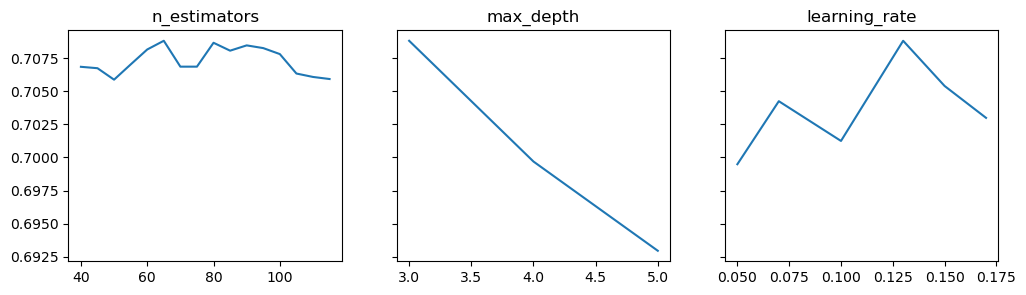

In [50]:
fig, axs=plt.subplots(1, 3, sharey=True, figsize=(12,3))
for param, ax in zip(['n_estimators', 'max_depth', 'learning_rate'], axs):
    param_df = res_df[['param_'+param,'mean_test_score']].groupby('param_'+param).max()
    ax.plot(param_df['mean_test_score'])
    ax.set_title(param)
    display(param_df.sort_values('mean_test_score', ascending=False))
plt.show()

So, we have discovered the best parameters for our model.

<h3 align='center'>Fit and Predict</h3>

Now is the time to fit our model and make some predictions.

In [51]:
model = gs.best_estimator_
model.fit(X,y)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=65, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Model has been fitted. Fistly let's try to predict prices for ten devices from dataset.

In [52]:
predictions = model.predict(X[0:10])
actual_prices = y[0:10].values
print("Predictions: \tActual prices: \tError:")
_=[print(predicted_value,"\t",actual_value,"\t", round(actual_value-predicted_value) ) 
   for predicted_value, actual_value in zip(predictions, actual_prices)]

Predictions: 	Actual prices: 	Error:
547.2553 	 604.99 	 58
209.05524 	 219.88 	 11
166.3799 	 181.49 	 15
199.02069 	 164.99 	 -34
205.5608 	 274.99 	 69
194.24216 	 186.99 	 -7
320.8954 	 329.99 	 9
411.84744 	 294.24 	 -118
415.13266 	 318.99 	 -96
205.5608 	 208.99 	 3


Prediction of custom device

In [53]:
sample={'brand_name': 'samsung','num_cores': 6,
        'ram_capacity': 4, 'internal_memory': 64,
        'battery_capacity': 5000, 'fast_charging_available': True,
        'primary_camera_rear': 50,'primary_camera_front': 13
        }
to_predict = pd.Series(sample)
display(to_predict)
type(to_predict)

brand_name                 samsung
num_cores                        6
ram_capacity                     4
internal_memory                 64
battery_capacity              5000
fast_charging_available       True
primary_camera_rear             50
primary_camera_front            13
dtype: object

pandas.core.series.Series

In [54]:
sample=pd.Series({'brand_name': 'samsung','num_cores': 6,
        'ram_capacity': 4, 'internal_memory': 64,
        'battery_capacity': 5000, 'fast_charging_available': True,
        'primary_camera_rear': 50,'primary_camera_front': 13
        })

sample_array = pd.DataFrame([sample], columns=sample.index)
sample_array['brand_name'] = sample_array['brand_name'].astype('category')
sample_array

,brand_name,num_cores,ram_capacity,internal_memory,battery_capacity,fast_charging_available,primary_camera_rear,primary_camera_front
0,samsung,6,4,64,5000,True,50,13


In [55]:
predicted_price = model.predict(sample_array)[0]
predicted_price

415.16858

<h3>Save</h3>

I am saving the model to file, in order to transfer it to server.

In [56]:
model.save_model('xgb_light_model.json')
#n_estimators is parameter only for training purposes, thus it is not saved in file.

c:\Users\KouLazos\anaconda3\envs\Phone_Price_Regression\lib\site-packages\xgboost\sklearn.py:761: UserWarning: n_estimators is not saved in Scikit-Learn meta.
  warnings.warn(


I am saving the list of brands' names for UI.

In [57]:
unique_categorical_values = {}
unique_categorical_values['brand_name']= sorted(list(X['brand_name'].unique()))
unique_categorical_values

{'brand_name': ['apple',
  'google',
  'honor',
  'huawei',
  'infinix',
  'iqoo',
  'motorola',
  'oneplus',
  'oppo',
  'other',
  'poco',
  'realme',
  'samsung',
  'tecno',
  'vivo',
  'xiaomi']}

In [58]:
import json

with open('unique_categorical_values.json', 'w') as fp:
    json.dump(unique_categorical_values, fp)